#Import Necessary Libraries

In [177]:
import numpy as np # numpy used for mathematical operation on array
import pandas as pd  # pandas used for data manipulation on dataframe
import matplotlib.pyplot as plt # matplotlib used for data visualization
import seaborn as sns # seaborn used for data visualization
import random
from sklearn.preprocessing import StandardScaler

#Reading Dataset

In [178]:
# Read the data with pandas

df= pd.read_csv("/content/Salary_Data.csv",nrows=7000)

In [179]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [180]:
# Reading last 5 Rows of the data

df.tail()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
6995,6/5/2019 11:30:36,Microsoft,59,Software Engineer,156000,"Redmond, WA",0.0,0.0,Full Stack,108000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
6996,6/5/2019 13:18:08,Skyscanner,H,Product Designer,117000,"London, EN, United Kingdom",8.0,3.5,Mobile (iOS + Android),107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
6997,6/5/2019 13:36:23,EPAM,M2,Software Engineering Manager,65000,"Minsk, HM, Belarus",15.0,10.0,DevOps,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
6998,6/5/2019 13:45:30,Credit karma,L5,Software Engineer,215000,"San Francisco, CA",11.0,1.0,Web Development (Front-End),0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
6999,6/5/2019 14:42:57,Google,L7,Software Engineer,750000,"New York, NY",14.0,11.0,Distributed Systems (Back-End),260000.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [181]:
# Checking the shape of the data

df.shape

(7000, 29)

In [182]:
# Checking the rows of the data

df.shape[0]

7000

In [183]:
# Checking the column of the data

df.shape[1]

29

In [184]:
# Checking the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                7000 non-null   object 
 1   company                  6999 non-null   object 
 2   level                    6996 non-null   object 
 3   title                    7000 non-null   object 
 4   totalyearlycompensation  7000 non-null   int64  
 5   location                 7000 non-null   object 
 6   yearsofexperience        7000 non-null   float64
 7   yearsatcompany           7000 non-null   float64
 8   tag                      6546 non-null   object 
 9   basesalary               7000 non-null   float64
 10  stockgrantvalue          7000 non-null   float64
 11  bonus                    7000 non-null   int64  
 12  gender                   4040 non-null   object 
 13  otherdetails             354 non-null    object 
 14  cityid                  

In [185]:
# Checking the summary statistics of the dataset

df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.0,7000.000000,7000.0,7000.0,7000.0,7000.000000,7000.0,7000.0,7000.0
mean,2.454068e+05,7.357476,2.914426,119086.121429,55319.521429,18866.624286,9253.194286,715.446143,4849.126714,0.000143,0.0,0.000714,0.0,0.0,0.0,0.000143,0.0,0.0,0.0
std,1.305372e+05,5.771663,3.302426,75629.141125,84800.238308,29533.233934,4125.306402,216.543345,2615.235191,0.011952,0.0,0.026718,0.0,0.0,0.0,0.011952,0.0,0.0,0.0
min,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,1153.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
25%,1.610000e+05,3.000000,1.000000,90000.000000,0.000000,0.000000,7416.000000,807.000000,2656.750000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
50%,2.100000e+05,6.000000,2.000000,135000.000000,25000.000000,14000.000000,7472.000000,807.000000,4830.500000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
75%,3.000000e+05,10.000000,4.000000,165000.000000,75000.000000,25000.000000,11521.000000,819.000000,7091.250000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
max,1.800000e+06,38.000000,30.000000,655000.000000,1000000.000000,1000000.000000,47926.000000,862.000000,9462.000000,1.000000,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0


In [186]:
# Checking the null values of the data

df.isnull()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
6996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
6997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
6998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [187]:
# We can see the data types of each column in a tabular format.

Data_dict = pd.DataFrame(df.dtypes)
Data_dict

,0
timestamp,object
company,object
level,object
title,object
totalyearlycompensation,int64
location,object
yearsofexperience,float64
yearsatcompany,float64
tag,object
basesalary,float64


In [188]:
# identifying the missing values of each column in a tabular format.

Data_dict['MissingVal'] = df.isnull().sum()
Data_dict

,0,MissingVal
timestamp,object,0
company,object,1
level,object,4
title,object,0
totalyearlycompensation,int64,0
location,object,0
yearsofexperience,float64,0
yearsatcompany,float64,0
tag,object,454
basesalary,float64,0


In [189]:
# identifying the unique values of each column in a tabular format.

Data_dict['UniqueVal'] = df.nunique()
Data_dict

,0,MissingVal,UniqueVal
timestamp,object,0,6981
company,object,1,493
level,object,4,666
title,object,0,14
totalyearlycompensation,int64,0,567
location,object,0,239
yearsofexperience,float64,0,51
yearsatcompany,float64,0,56
tag,object,454,418
basesalary,float64,0,274


In [190]:
# identifying count of the variable.

Data_dict['Count'] = df.count()
Data_dict

,0,MissingVal,UniqueVal,Count
timestamp,object,0,6981,7000
company,object,1,493,6999
level,object,4,666,6996
title,object,0,14,7000
totalyearlycompensation,int64,0,567,7000
location,object,0,239,7000
yearsofexperience,float64,0,51,7000
yearsatcompany,float64,0,56,7000
tag,object,454,418,6546
basesalary,float64,0,274,7000


In [191]:
# Checking the sum of null values of the data

df.isnull().sum()

timestamp                     0
company                       1
level                         4
title                         0
totalyearlycompensation       0
location                      0
yearsofexperience             0
yearsatcompany                0
tag                         454
basesalary                    0
stockgrantvalue               0
bonus                         0
gender                     2960
otherdetails               6646
cityid                        0
dmaid                         0
rowNumber                     0
Masters_Degree                0
Bachelors_Degree              0
Doctorate_Degree              0
Highschool                    0
Some_College                  0
Race_Asian                    0
Race_White                    0
Race_Two_Or_More              0
Race_Black                    0
Race_Hispanic                 0
Race                       6999
Education                  6994
dtype: int64

In [192]:
# Droping of the columns which are not important

df=df.drop(["Race","otherdetails","tag"],axis=1)

In [193]:
# Checking the Updated shape of the data

df.shape

(7000, 26)

In [194]:
# Checking the sum of null values of the updated data

df.isnull().sum()

timestamp                     0
company                       1
level                         4
title                         0
totalyearlycompensation       0
location                      0
yearsofexperience             0
yearsatcompany                0
basesalary                    0
stockgrantvalue               0
bonus                         0
gender                     2960
cityid                        0
dmaid                         0
rowNumber                     0
Masters_Degree                0
Bachelors_Degree              0
Doctorate_Degree              0
Highschool                    0
Some_College                  0
Race_Asian                    0
Race_White                    0
Race_Two_Or_More              0
Race_Black                    0
Race_Hispanic                 0
Education                  6994
dtype: int64

In [195]:
# Impute "categorical null values" with Mode value

df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['Education'].fillna(df['Education'].mode()[0], inplace=True)

In [196]:
# Filling the nan values as not given

df.fillna("Not_given", inplace = True)

In [197]:
# Checking the sum of null values of the updated data

df.isnull().sum()

timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
cityid                     0
dmaid                      0
rowNumber                  0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
Education                  0
dtype: int64

In [198]:
# Droping the unwanted columns

df.drop(columns='timestamp', inplace=True)
df.drop(columns='Masters_Degree', inplace=True)
df.drop(columns='Bachelors_Degree', inplace=True)
df.drop(columns='Doctorate_Degree', inplace=True)
df.drop(columns='Highschool', inplace=True)
df.drop(columns='Some_College', inplace=True)

In [199]:
df.drop(columns='Race_Asian', inplace=True)
df.drop(columns='Race_White', inplace=True)
df.drop(columns='Race_Two_Or_More', inplace=True)
df.drop(columns='Race_Black', inplace=True)
df.drop(columns='Race_Hispanic', inplace=True)
df.drop(columns='level', inplace=True)
df.drop(columns='rowNumber', inplace=True)

In [200]:
# Checking the Updated shape of the data

df.shape

(7000, 13)

In [201]:
# Checking the Updated columns of the data

df.columns

Index(['company', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue',
       'bonus', 'gender', 'cityid', 'dmaid', 'Education'],
      dtype='object')

In [202]:
# Converting categorical variables to numerical variables

from sklearn.preprocessing import LabelEncoder

# Define a categorical feature
company = df['company']
title = df['title']
gender = df['gender']
location = df['location']
Education = df['Education']


# Create a label encoder object
le = LabelEncoder()

# Fit the label encoder to the categorical feature and transform it
df['company'] = le.fit_transform(company)
df['title'] = le.fit_transform(title)
df['gender'] = le.fit_transform(gender)
df['location'] = le.fit_transform(location)
df['Education'] = le.fit_transform(Education)

#Data Visualization

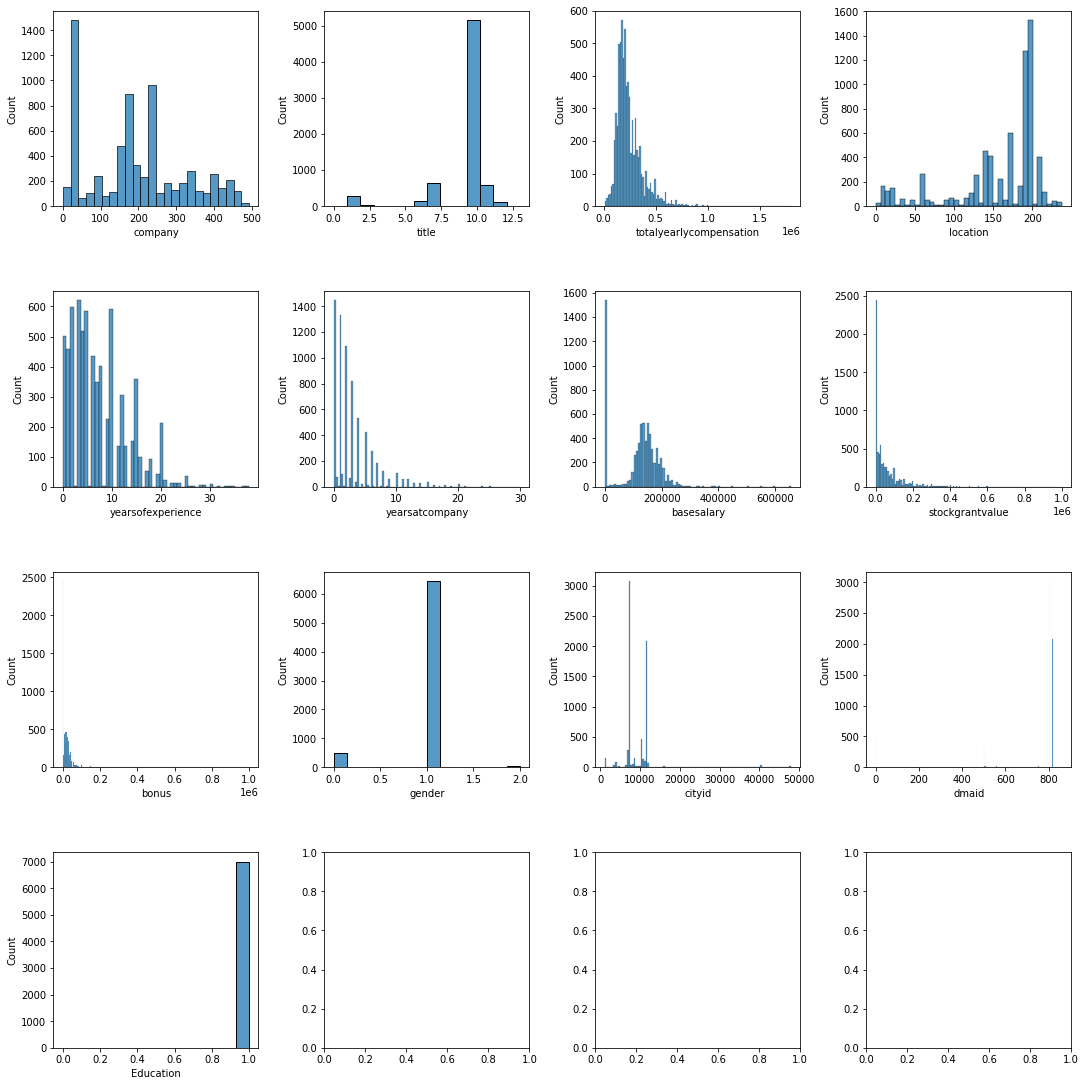

In [203]:
"""
The code generates a grid of subplots where each subplot shows the distribution,
(i.e., histogram) of a variable/column in the df DataFrame.
This type of plot can be useful for exploring the shape and spread of each variable in a dataset.
"""

fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(15, 15))
axs = axs.flatten()
for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


<AxesSubplot:>

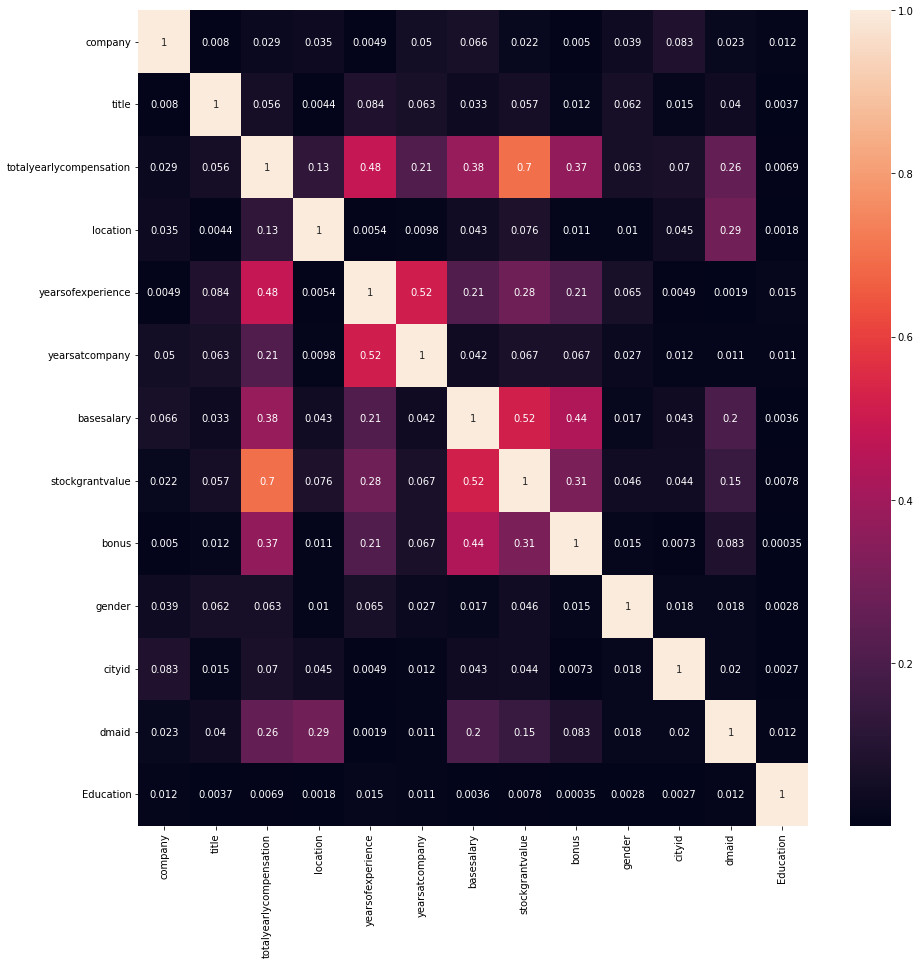

In [204]:
"""
Heatmap function to visualize the correlation matrix of the columns.
It hows the pairwise correlations (i.e., linear relationships) between all pairs of variables/columns in the DataFrame.
"""

plt.figure(figsize=(15, 15))
sns.heatmap(df.corr().abs(),annot=True)

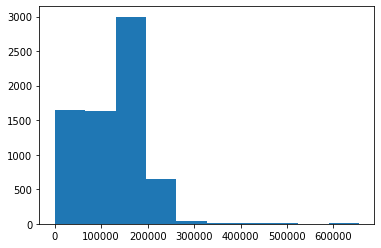

In [205]:
"""
This graps provide a basic summary and visualization of the distribution of the basesalary column.
The x-axis of the histogram will represent the range of basesalary values, divided into several bins, 
and the y-axis will represent the frequency of observations falling into each bin. 
"""

df.describe()
plt.hist(df['basesalary'])
plt.show()

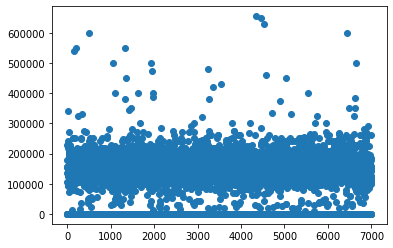

In [206]:
# Scatterplot, with df.index as the values for the x-axis and df['basesalary'] as the values for the y-axis.

plt.scatter(df.index, df['basesalary'])
plt.show()

In [207]:
def find_outliers_IQR(df):
  Q1 = np.percentile(df, 25)
  Q3 = np.percentile(df, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  outliers = df[(df > lower_bound) | (df < upper_bound)]
  return outliers, Q1, Q3, IQR

In [208]:
outliers=find_outliers_IQR(df)
print(outliers)

(      company  title  totalyearlycompensation  location  yearsofexperience  \
0         286      7                   127000       175                1.5   
1         460     10                   100000       189                5.0   
2          28      7                   310000       200                8.0   
3          37     11                   372000       210                7.0   
4         243     10                   157000       140                5.0   
...       ...    ...                      ...       ...                ...   
6995      243     10                   156000       173                0.0   
6996      348      6                   117000       115                8.0   
6997      134     11                    65000       134               15.0   
6998      115     10                   215000       189               11.0   
6999      171     10                   750000       149               14.0   

      yearsatcompany  basesalary  stockgrantvalue  bonus  gend

In [209]:
# Split the data into features and target

features = df.drop(['basesalary'], axis=1).values
target = df['basesalary'].values.reshape(-1, 1)

In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33,  random_state = 2)

#LASSO REGRESSION

In [211]:
# creating a class for Lasso Regression

class Lasso_Regression():

  #initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter


  # fitting the dataset to the Lasso Regression model
  def fit(self, X, Y):

    # m --> number of Data points --> number of rows
    # n --> number of input features --> number of columns
    self.m, self.n = X.shape

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization

    for i in range(self.no_of_iterations):     # missed "self"
      self.upadte_weights()


  # function for updating the weight & bias value
  def upadte_weights(self):

    # linear equation of the model
    Y_prediction = self.predict(self.X)

    # gradients (dw, db)

    # gradient for weight
    dw = np.zeros(self.n)

    for i in range(self.n):

      if self.w[i]>0:

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m 

      else :

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m


    # gradient for bias
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m


    # updating the weights & bias

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

    


  # Predicting the Target variable
  def predict(self,X):
    return np.dot(X, self.w.reshape(-1,1)) + self.b
  
  def mean_squared_error(self,y_true, y_pred):
   
      # Check if the lengths of both arrays are equal
      if len(y_true) != len(y_pred):
          raise ValueError("Length of y_true and y_pred should be the same.")
      
      # Calculate the squared differences between the true and predicted values
      squared_differences = [(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]
      
      # Calculate the mean of the squared differences
      mse1 = sum(squared_differences) / len(squared_differences)
      
      return mse1
  def r2(self,y_true, y_pred):
    # Calculate the mean of the true values
    y_true_mean = sum(y_true) / len(y_true)
    
    # Calculate the total sum of squares (TSS)
    tss = sum((y_true - y_true_mean) ** 2)
    
    # Calculate the residual sum of squares (RSS)
    rss = sum((y_true - y_pred) ** 2)
    
    # Calculate the R-squared value
    r2_score = 1 - (rss / tss)
    
    return r2_score


This  creates a new class called Lasso_Regression.

Next is the constructor method for the class. It initializes the hyperparameters of the Lasso Regression model, which are the learning rate, the number of iterations, and the lambda parameter.

Next is the fit method that fits the training dataset to the Lasso Regression model. It initializes the weights and the bias term to zero, then sets the input feature matrix X and target vector Y. It then updates the weights and bias term by calling the "upadte_weights" method in each iteration of the gradient descent algorithm.

Next method updates the weights and bias term according to the gradients of the cost function. It calculates the predicted values of the target variable Y using the current weights and bias term. Then, it computes the gradients of the cost function with respect to the weights and bias term. Finally, it updates the weights and bias term using the learning rate and the gradients.

Next method predicts the target variable Y given an input feature matrix X. It computes the dot product of the input feature matrix X and the weight vector w, then adds the bias term b.

In [171]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [213]:
model = Lasso_Regression(learning_rate = 0.1, no_of_iterations=1000,
                         lambda_parameter=200)

In [214]:
model.fit(X_train, y_train)

In [215]:
test_data_prediction = model.predict(X_test)

In [216]:
from sklearn import metrics

# R squared error
score_1 = model.r2(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = model.mean_squared_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Squared Error : ', score_2)

R squared error :  [nan]
Mean Squared Error :  [nan]


In [176]:
def randomized_search_cv(X, y, model, param_distributions, n_iter=10, cv=3, random_state=None):
    if random_state is not None:
        random.seed(random_state)
        
    best_score = float('-inf')
    best_params = None
    
    for i in range(n_iter):
        params = {}
        for param_name, distribution in param_distributions.items():
            if isinstance(distribution, list):
                params[param_name] = random.choice(distribution)
            elif isinstance(distribution, tuple) and len(distribution) == 2:
                low, high = distribution
                params[param_name] = random.uniform(low, high)
            else:
                raise ValueError('Invalid parameter distribution')
        
        model.set_params(**params)

        
        scores = []
        for j in range(cv):
            mask = [k % cv != j for k in range(len(X))]
            X_train = X[mask]
            y_train = y[mask]
            X_test = X[~mask]
            y_test = y[~mask]
            
            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            scores.append(score)
        
        mean_score = sum(scores) / len(scores)
        if mean_score > best_score:
            best_score = mean_score
            best_params = params
            
    return best_params, best_score

def randomized_search_cv(X, y, model, param_distributions, n_iter=10, cv=3, random_state=None):


This is a function definition for randomized_search_cv, which takes in five parameters: X, y, model, param_distributions, n_iter, cv, and random_state.

X: The input features (independent variables) as a NumPy array or Pandas DataFrame.

y: The output labels (dependent variable) as a NumPy array or Pandas Series.

model: An estimator object implementing fit and score methods.

param_distributions: A dictionary of hyperparameters and their distributions to sample from.

n_iter: The number of parameter settings that are sampled.

cv: The number of folds in cross-validation.

random_state: A seed for the random number generator

    if random_state is not None:
        random.seed(random_state)
If random_state is not None, this sets the seed for the random number generator.

best_score = float('-inf')

    best_params = None
    
Initialize the variables best_score and best_params.

best_score: The highest score achieved so far.
best_params: The hyperparameters that achieved the best score.

 for i in range(n_iter):
 
Iterate n_iter times.

     params = {}
Initialize an empty dictionary to store the hyperparameters.

     for param_name, distribution in param_distributions.items():
Iterate over the hyperparameters and their distributions.

if isinstance(distribution, list):

                params[param_name] = random.choice(distribution)
If the distribution is a list, randomly select a value from it.

elif isinstance(distribution, tuple) and len(distribution) == 2:

                low, high = distribution
                params[param_name] = random.uniform(low, high)
If the distribution is a tuple of length 2, randomly select a value from a uniform distribution between the two values.

else:

                raise ValueError('Invalid parameter distribution')
If the distribution is not a list or a tuple of length 2, raise an error.

 model.set_params(**params)
 
Set the hyperparameters of the model to the randomly selected values.

 scores = []
 
Initialize an empty list to store the scores.

 for j in range(cv):
 
Iterate over cv folds for cross-validation.

   mask = [k % cv != j for k in range(len(X))]
   
            X_train = X[mask]
            y_train = y[mask]
            X_test = X[~mask]
            y_test = y[~mask]

Split the data into training and testing sets for the current fold of cross-validation.

model.fit(X_train, y_train)

            score = model.score(X_test, y_test)
            scores.append(score)
Fit the model on the training data and evaluate the score on the testing data, and append the score to the list of scores.

  mean_score = sum(scores) / len(scores)
  
Calculate the mean score across all folds of cross-validation.

    if mean_score > best_score:
            best_score = mean_score
            best_params = params
If the mean score is greater than the current best score, update the best score and best hyperparameters.